In [1]:
import pandas as pd
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() 
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import json
from bs4 import BeautifulSoup

#we want to see what the price of a certain security will be in the future 

# PARAMETERS

In [2]:
ticker = 'SAN.MC' #lets get Santander bank from ibex 35 
num_simulations = 1000
num_days = 252 #252 annual bussiness days
fecha_inicio = '2012-01-01'
fecha_final = '2018-8-24'
indice = '^IBEX' #benchmark for latter comparisons

# SIMULATION


In [ ]:
security = pdr.get_data_yahoo(ticker, 
                           fecha_inicio,
                            fecha_final)

In [4]:
security.head()
security.index = pd.to_datetime(security.index)

In [5]:
security = security['Adj Close']
returns = security.pct_change()

In [6]:
last_price = security[-1]

In [8]:
simulations_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1+ np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251: #porque pandas starts from 0
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append (price)    
        count +=1    
    simulations_df[x] = price_series

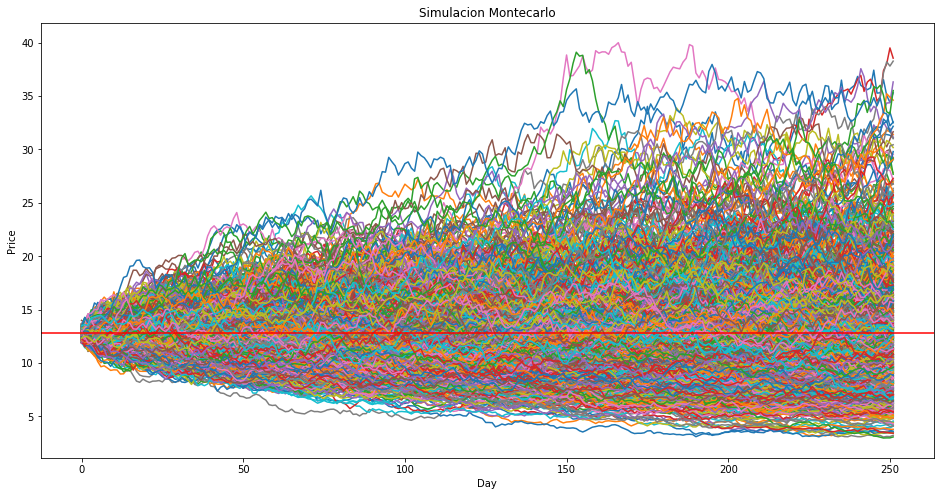

PRECIO DE SGRE.MC HOY:  12.79 euros
MAXIMO PRECIO DE SGRE.MC EN EL FUTURO:  38.55 euros
MINIMO PRECIO DE SGRE.MC EN EL FUTURO:  3.08 euros


In [9]:
fig = plt.figure(figsize = (16,8))
plt.plot(simulations_df)
plt.axhline(y = last_price, color = 'r')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Montecarlo Simulation')
plt.show()
minimo_p =simulations_df.min(axis = 1).iloc[-1]
max_p =simulations_df.max(axis = 1).iloc[-1]
print('PRICE '+ticker+' TODAY:  %.2f' %last_price +' euros')
print('MAX PRICE ' + ticker+' FUTURE:  %.2f' %max_p +' euros')
print('MIN PRICE ' + ticker+' FUTURE:  %.2f' %minimo_p +' euros')

In [42]:
simulations_df=simulations_df.transpose()

In [43]:
datos_252 = simulations_df.iloc[:,-1]

In [44]:
datos_252 = pd.DataFrame(datos_252, index = simulations_df.index)

In [45]:
datos_252.columns = ['last_day']

In [46]:
datos_252.head()

,ultimo_dia
0,21.452460
1,3.525435
2,13.120641
3,11.122290
4,4.847264


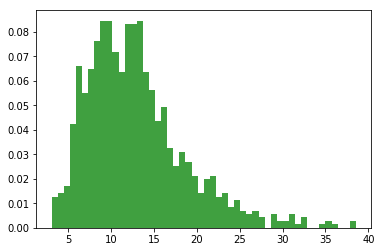

In [47]:
n, bins, patches = plt.hist(datos_252['last_day'], 50, density=True, facecolor='g', alpha=0.75)


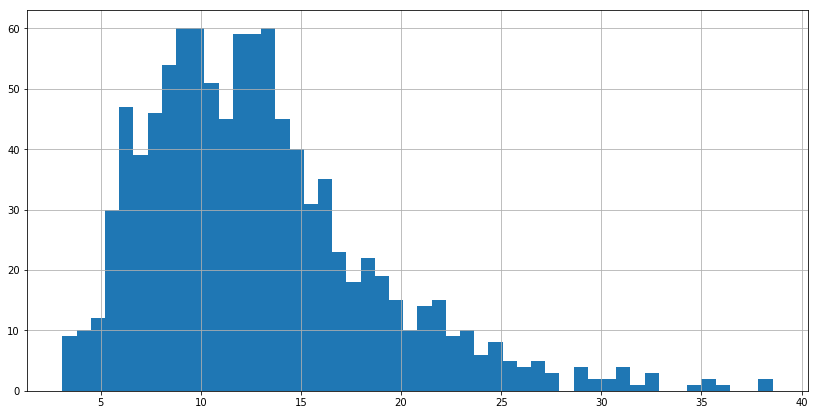

In [68]:
plt.figure(figsize = (14,7))
plt.hist(datos_252['last_day'], 50)
plt.grid()
plt.show();

In [60]:
intervalos = pd.cut(datos_252['last_day'],4)
pd.value_counts(intervalos)

(3.048, 11.951]     490
(11.951, 20.818]    409
(20.818, 29.685]     84
(29.685, 38.552]     17
Name: ultimo_dia, dtype: int64

# Comparison with the benchmark

In [73]:
yf.pdr_override() 
indice_referencia = pdr.get_data_yahoo(indice, 
                           fecha_inicio,
                            fecha_final)

[*********************100%***********************]  1 of 1 downloaded


In [76]:
indice_referencia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,8558.000000,8724.200195,8557.400391,8723.799805,8723.791016,102660000
2012-01-03,8739.200195,8743.299805,8597.099609,8732.400391,8732.391602,186689000
2012-01-04,8683.400391,8701.299805,8526.799805,8581.799805,8581.791016,243803000
2012-01-05,8598.700195,8598.700195,8301.200195,8329.599609,8329.590820,192704000
2012-01-06,8369.700195,8445.900391,8233.799805,8289.099609,8289.090820,153765000


In [77]:
indice_referencia = indice_referencia['Adj Close'].pct_change()

In [82]:
df = pd.concat([indice_referencia, returns], axis = 1).dropna()
df.columns = ['benchmark_returns', 'returns_security']
df.head()

,indice_returns,returns_security
Date,,
2012-01-03,0.000986,-0.000299
2012-01-04,-0.017246,-0.068379
2012-01-05,-0.029388,-0.012821
2012-01-06,-0.004862,-0.023701
2012-01-09,-0.001230,-0.008979


No handles with labels found to put in legend.


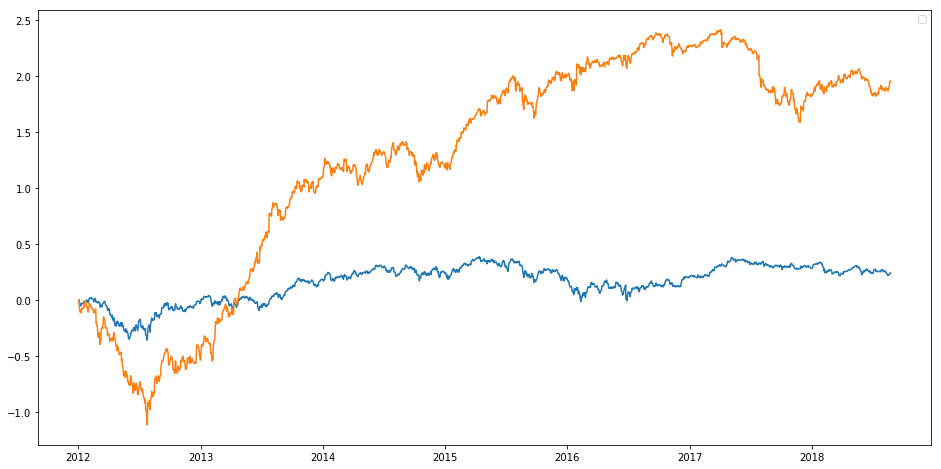

In [125]:
plt.figure(figsize = (16,8))
plt.legend()
plt.plot(df.cumsum());

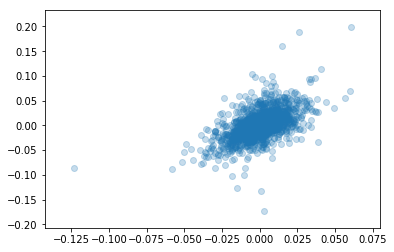

In [85]:
plt.scatter(df['benchmark_returns'],df['returns_security'], alpha = 0.25);

In [86]:
df.corr()

,indice_returns,returns_security
indice_returns,1.000000,0.559575
returns_security,0.559575,1.000000


In [92]:
import scipy as sp

In [93]:
beta,alpha,r_value,p_value,std_err = sp.stats.linregress(df['benchmark_returns'],df['returns_security'])

In [94]:
beta

1.1691549430822288

In [95]:
alpha

0.000984793646511886

In [98]:
r_value # quality of adjustment not really good

0.559574767656849

In [100]:
import seaborn as sns

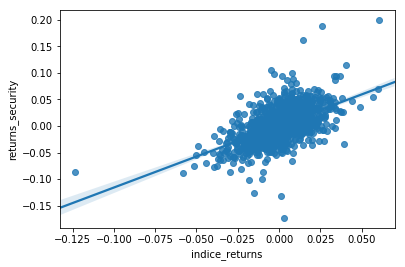

In [113]:
sns.regplot(df['benchmark_returns'],df['returns_security']);